### Questions

### Objectives
YWBAT

* day 1
    * define a PMF, PDF and CDF
    * list the parameters that define specific distributions (Bernoulli and Binomial, Normal)
    * evaulate a normal distribution

* day 2
    * list the parameters that define specific distributions
    * apply distributions to solve problems
    * list scenarios where each distribution can be used


### Outline
* Discuss some distributions and their use cases
* Normal distribution measurements (skewness, kurtotis, jacque-bera)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

### What is/are a parameter(s)?
From parameters we get an idea of how it looks
Parameters define a distribution

### Normal Distribution
* Discrete or Continuous? 
    * you can apply both
* Parameters
    * standard deviation, $\sigma$
    * mean, $\mu$
* Use Cases
    * When we're asking questions about a sample or a population. 
    
* Examples
    * Given a normal distribution of discuss throws has a mean of 80 ft and a standard deviation of 5 ft, what is the probability of choosing a throw that is 70 ft? 
        * P(70) = 0
        * P(X=x) = 0, for all values of x
    * To calculate probabilities of a continuous distribution you need an interval.
    
    * This would change to 
        *  * Given a normal distribution of discuss throws has a mean of 80 ft and a standard deviation of 5 ft, what is the probability of choosing a throw that is between 69.9 ft and 70.1 ft? 
        
### (Bernoulli) Binomial Distribution
* Parameters
    * probability of success, p
    * number of trials, n
    * number of successes, k
* Use Cases
    * binary results (yes vs no, hit vs miss, 0 vs 1, win vs loss)
    * If you have a fairly weighted coin and you flip it 5 times, what is the probability of flipping a head 4 times? 
        * does this use a PDF or CDF? PDF, because I'm asking for one specific value on my Probability Distribution
        * 5C4(0.5^5)
    * If you have a fairly weighted coin and you flip it 5 times, what is the probability of flipping at least 4?
        * P(4 heads|X=0.50) + P(5 heads|X=0.50) = 5C4(0.5^5) + 5C5(0.5^5)
        
    * The probability of Andrew spending more 20 dollars at HEB is 0.10.  If Andrew goes to HEB 4 times a month, what is the probability he spends more than 20 dollars at least twice. 
        * CDF 
        * P(k>=2|p(k)==0.10, n=4) = P(2) + P(3) + P(4) 
            * P(2) = 4C2(0.1^2 \* 0.9^2)
            * P(3) = 4C3(0.1^3 \* 0.9)
            * P(4) = 4C4(0.1^4)
        
    * Continuous or Discrete?
        * Discrete, because it's defined by n trials and k successes, both are integers and because it's win vs loss which is binary. 
 

    
    
### Poisson Distribution
* Parameters
* Use Cases


### Exponential Distributionf
* Parameters
* Use Cases
    

### Uniform Distribution
* Parameters
* Use Cases

### Let's get into Normal Distributions
how do we measure normality?

* Mean, Median, Mode being equal...hmmm...this is great for symmetry, but misses the bell curve
* 65, 95, 99.7 test 1std, 2std, 3stds from the mean, checks the bell curve
* Skewness....
    * How well the data is distributed about the mean
    * How 'centered' the data is
    * which direction the data is stretched
* Kurtosis....
    * How fat/thin the tails are

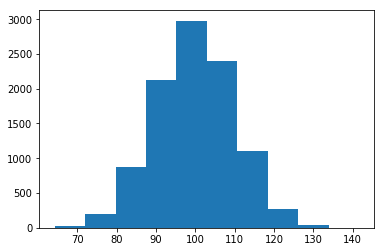

In [25]:
# let's make a random list of integers between 0 and 20
x = np.random.normal(100, 10, 10000)
plt.hist(x)
plt.show()

In [26]:
# let's calculate skewness and kurtosis
# desired skewness = 0
# skewness measures symmetry

print(f"Skewness = {stats.skew(x)}")


# desired kurtosis score = 3
print(f"Kurtosis (normal) = {stats.kurtosis(x, fisher=False)}")
print(f"Kurtosis (Fisher) = {stats.kurtosis(x)}")

Skewness = -0.00037496692678199914
Kurtosis (normal) = 2.9211109969902465
Kurtosis (Fisher) = -0.07888900300975354


In [27]:
# test for normality
# shapiro test
# H0 : x is normal (fail to reject this) -> pvalue > 0.05
# HA: x is not normal

stats.shapiro(x)

(0.999799907207489, 0.5040658712387085)

### get percentages for standard deviation ranges

In [28]:
# what does this return?
for i in range(1, 5):
    num_points = np.where(abs(x) < (x.mean() + i*x.std()))[0].shape[0]
    print("points within {} standard deviations = {}".format(i, num_points/100))
    # tuple 

points within 1 standard deviations = 83.92
points within 2 standard deviations = 97.85
points within 3 standard deviations = 99.88
points within 4 standard deviations = 99.99


### Standard Normal Distribution
* This is a normal distribution
* mu = 0, std = 1
* How can we transform any distribution to the standard normal?

99.83835301532702 9.98035682742741


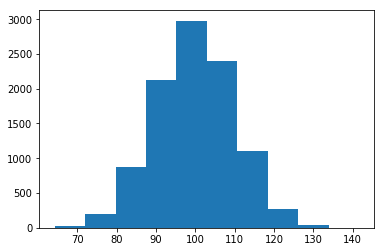

In [33]:
print(x.mean(), x.std())
plt.hist(x)
plt.show()

In [32]:
np.std(x - x.mean())

9.98035682742741

In [34]:
def zscore(x):
    return (x - x.mean()) / x.std()

In [35]:
x_standard = zscore(x)

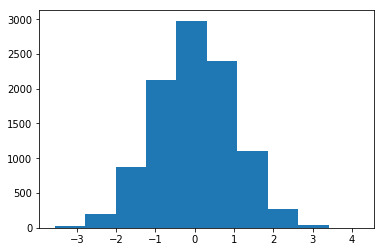

In [37]:
plt.hist(x_standard)
plt.show()

In [40]:
print(x[0], x_standard[0])
print(x[1], x_standard[1])

# the standard deviations a point is from the mean

93.70523689759194 -0.6145187215030643
89.24607124223652 -1.0613129326179427


### What is the benefit of standardizing normal distributions? 
* You can more easily see the points within standard deviations
* Makes it easier to compare datasets

### What did we learn? 
* Learned the explicit difference and visual difference between PDF and CDF.
* What are zcore standardization
* Continuous vs discrete
* Skewness measures the symmetry around the mean
* Kurtosis measures the peakiness
    * small kurtosis - most points are really close to the mean
    * large kurtosis - lots of outliers
* What does a zscore measure? 
    * 'distance' from the mean in terms of standard deviation

### Objectives for Day 2
YWBAT 
* define the parameters and cases for exponential, poisson, uniform distributions
* explain ztesting

### Outline
* take notes on the parameters for 
    * uniform distributions
    * poisson distributions
    * exponential distributions

### Notes on Distributions
- Uniform
    * Parameters
        * possible outcomes
            * why is rolling a dice uniform? - because each outcome has the same probability
            * discrete
                * rolling a dice
                * flipping a coin
                * making a turn that you don't care about
                * drawing a card as the first card from a deck
                * P(X=event|n_outcomes) = $\frac{1}{n}$
            * continuous
                * the numbers between 1 and 5
                    * P(X = 2) = 0
                    * P(X <= 3) = 2 * 0.25 = 0.50
                * the numbers between 1 and 6
                    * P(X <= 2 or X>=5) = P(X<=2) + P(X>=5) = 0.20 + 0.20 = 0.40
                    * P(X <= 5) = 0.8
                * P(X=event|continuous range) = 0

- Poisson Distributions
    * Parameters
        * lambda $\lambda$, rate of an event occurring
            * 2 measurements, event/interval
        * x or n, number of events to occur in that interval
    * Discrete
        * number of events is always a whole number
    * Example
        * There are 10 people that tweet about the google pixel 4, every 20 minutes. What is the probability that 5 people will tweet about it in 20 minutes? 
        
        
 - Exponential Distribution
     * Parameters
         * lambda, rate of change
     * Continuous
         * continuous version of poisson
         * P(X=k) = 0
     * Example of Scenarios
         * Half Life of a particle
         * Culture in a petri dish
         * Battery Life of your phone/laptop
         * Human population
         * The likeliness that Schröedingers cat has died
         * Inflation
         * Interest

In [46]:
import numpy as np
from math import factorial

def poisson(lam, x):
    p = (lam**x * np.exp(-lam)) / factorial(x)
    return p

In [59]:
events = list(range(0, 50))

# rate is the number of occurences in investigated time interval
# 
lam = 10 

probabilities = [poisson(lam=lam, x=i) for i in events]

In [60]:
import matplotlib.pyplot as plt

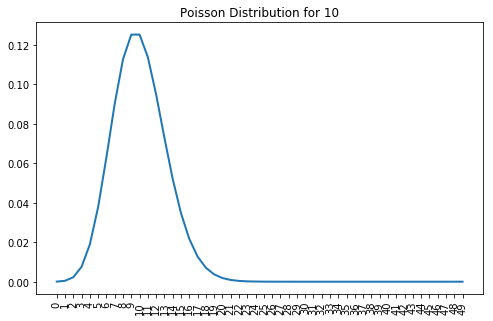

In [62]:
plt.figure(figsize=(8, 5))
plt.plot(events, probabilities, linewidth=2)
plt.title(f"Poisson Distribution for {lam}")
plt.xticks(events, events, rotation=90)
plt.show()

Question 2:

There are 10 people that tweet about the google pixel 4, every 20 minutes. What is the probability that 5 people will tweet about it in 5 minutes?

In [64]:
lam = 10/4 # since 10 people tweet every 20 minutes and 20/4 = 5 minutes

poisson(lam=lam, x=5)

0.06680094289054264

### What is something you learned about? 
* In a poisson distribution, time (or your interval) is very important
* Poisson distributions are discrete because the number of the events is whole
* Poisson/Exponential is used for observing the rate of change on an interval
    * Poisson observations are discrete
    * Exponential are continuous
* How do you calculate the probability of a uniform continuous distribution?
    * Calculate the area of the rectangle bounded by your desired events
    * It's a rectangle, because in a uniform distribution, every event has the same probability of occurring